In [1]:
import astropy as ap
import astropy.io.fits as ap_fits
import astropy.modeling as ap_mod
import copy
import glob
import inspect
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as np_ma
import scipy as sp
import scipy.optimize as sp_opt
import scipy.stats as sp_stat

import IfA_Smeargle as ifa

In [ ]:
fits,header,data = ifa.meta.fits_and_arrays.smeargle_open_fits_file("190510_T40K_2hrdark_2.5VdetBias_up_16avg_GN_CDS_ADU_per_ksec.fits")

In [ ]:
fig, ax = plt.subplots(1, 1)
ifa.hotel.plot_array_heatmap_image(data,figure_axes=ax)

#plt.imshow(data, cmap='hot')
#plt.colorbar()
#plt.show()

In [ ]:
mask = np.full_like(data,False)
mask[10:,:] = True
masking_data = np_ma.array(data,mask=mask)

ifa.hotel.plot_array_heatmap_image(masking_data)

In [ ]:
y_bounds = [50,250]
x_bounds = [100,150]

sub_data = ifa.meta.smeargle_extract_subarray(data,x_bounds,y_bounds)

fig2, ax2 = plt.subplots(1, 1)
ifa.hotel.plot_array_heatmap_image(sub_data,figure_axes=ax2)

In [ ]:
hist_data = plt.hist(data.flatten(),bins=50,range=None,log=8)

# Define the x-axis values, that is, the center of each bar.
hist_x = (hist_data[1][0:-1] + hist_data[1][1:])/2
hist_y = hist_data[0]
plt.plot(hist_x,hist_y)

plt.show()

In [ ]:
fig2, ax2 = plt.subplots(1, 1,figsize=(15,15))
ax2 = ifa.hotel.plot_array_histogram(data.flatten(),figure_axes=ax2,
                                    histogram_plot_paramters={'bins':50, 'range':None,'log':False})[1]
print(ax2)

In [ ]:
fig3, ax3 = plt.subplots(3, 4,figsize=(10,6),dpi=100)

ax3[:,0]

# y , x
for axesdex in ax3[:,0]:
    ifa.hotel.plot_array_heatmap_image(sub_data,figure_axes=axesdex)
for axesdex in ax3[:,2]:
    ifa.hotel.plot_array_heatmap_image(sub_data,figure_axes=axesdex)
    
# Hist
for axesdex in ax3[:,1]:
    ifa.hotel.plot_array_histogram(data.flatten(),figure_axes=axesdex)
    axesdex.set_aspect(1/(axesdex.get_data_ratio() * 2))
for axesdex in ax3[:,3]:
    ifa.hotel.plot_array_histogram(data.flatten(),figure_axes=axesdex)
    axesdex.set_aspect(1/(axesdex.get_data_ratio() * 2))
    
fig3.tight_layout()
fig3.subplots_adjust(right=0.9)
plt.show(fig3)


In [ ]:
#fig4, ax4 = plt.subplots(1, 2,figsize=(9,3.5),dpi=100)

figure = ifa.hotel.plot_single_heatmap_and_histogram(data)
    
plt.show(figure)

In [ ]:
fig5, ax5 = plt.subplots(3, 4,figsize=(12,6),dpi=200)

temp_data = sub_data

def double_axes(temp_data,axes_1,axes_2):
    ifa.hotel.plot_array_heatmap_image(temp_data,figure_axes=axes_1)

    ifa.hotel.plot_array_histogram(temp_data.flatten(),figure_axes=axes_2)
    axes_2.set_aspect(1/(axes_2.get_data_ratio() * 1.5))
    #print(axes_2.get_data_ratio())

    
for axes1dex,axes2dex in zip(ax5[:,0],ax5[:,1]):
    double_axes(temp_data,axes1dex,axes2dex)
    

#for axes1dex,axes2dex in zip(ax5[:,2],ax5[:,3]):
#    double_axes(temp_data,axes1dex,axes2dex)
    
    
fig5.tight_layout()
plt.show(fig5)

In [ ]:
fig6, ax6 = plt.subplots(3, 6,figsize=(12,6),dpi=200)

ax6[0,0] = plt.subplot2grid((3, 6), (0, 0))
ax6[0,1] = plt.subplot2grid((3, 6), (0, 1), colspan=2)
ax6[1,0] = plt.subplot2grid((3, 6), (1, 0))
ax6[1,1] = plt.subplot2grid((3, 6), (1, 1), colspan=2)
ax6[2,0] = plt.subplot2grid((3, 6), (2, 0))
ax6[2,1] = plt.subplot2grid((3, 6), (2, 1), colspan=2)

ax6[0,3] = plt.subplot2grid((3, 6), (0, 3))
ax6[0,4] = plt.subplot2grid((3, 6), (0, 4), colspan=2)
ax6[1,3] = plt.subplot2grid((3, 6), (1, 3))
ax6[1,4] = plt.subplot2grid((3, 6), (1, 4), colspan=2)
ax6[2,3] = plt.subplot2grid((3, 6), (2, 3))
ax6[2,4] = plt.subplot2grid((3, 6), (2, 4), colspan=2)

#print(ax6)

lol_data = sub_data
# y , x
for axesdex in ax6[:,0]:
    ifa.hotel.plot_array_heatmap_image(lol_data,figure_axes=axesdex)
for axesdex in ax6[:,3]:
    ifa.hotel.plot_array_heatmap_image(lol_data,figure_axes=axesdex)
    
# Hist
for axesdex in ax6[:,1]:
    ifa.hotel.plot_array_histogram(lol_data.flatten(),figure_axes=axesdex)
    axesdex.set_aspect(1/(axesdex.get_data_ratio() * 1.5))
for axesdex in ax6[:,4]:
    ifa.hotel.plot_array_histogram(lol_data.flatten(),figure_axes=axesdex)
    axesdex.set_aspect(1/(axesdex.get_data_ratio() * 1.5))
    
fig6.tight_layout()
plt.show(fig6)

In [ ]:
config = ifa.yankee.SmeargleConfig()
function_000_list = dict(inspect.getmembers(ifa.echo.masks_echo000,inspect.isfunction))
function_100_list = dict(inspect.getmembers(ifa.echo.masks_echo100,inspect.isfunction))
function_200_list = dict(inspect.getmembers(ifa.echo.masks_echo200,inspect.isfunction))
function_300_list = dict(inspect.getmembers(ifa.echo.masks_echo300,inspect.isfunction))

function_list = {**{**function_000_list,**function_100_list},**{**function_200_list,**function_300_list}}

filter_list = copy.deepcopy(function_list)
for keydex,valuedex in function_list.items():
    if (not 'echo' in keydex):
        del filter_list[keydex]

print(filter_list)

In [ ]:
param_list = dict(inspect.getmembers(config.EchoConfig))
new_param = copy.deepcopy(param_list)
for keydex,valuedex in param_list.items():
    if (not 'echo' in keydex):
        del new_param[keydex]

In [ ]:
new_param['echo010_config']['run']

In [ ]:
ifa.bravo.rename.voltage_pattern_rename_fits('./Data/',[1,2,3,4,5,6,7,8,9],
                                             common_prefix='190510_T40K_2hrdark',common_suffix='blew.fits')

In [ ]:
original_names = glob.glob('./Data' + '/*.fits')
#print(original_names)

hdu_file, header, data = ifa.meta.meta_faa.smeargle_open_fits_file(original_names[1])
data

In [ ]:
median_data = np.median(data,axis=0)
median_data.shape

In [ ]:
config_file = ifa.yankee.SmeargleConfig(config_file_name='trial.ifaspkl')

In [ ]:
ifa.bravo.bravo_execution_saphria('./Data',config_file)

In [7]:
newconfig = ifa.yankee.SmeargleConfig('test.ifaspkl')

In [ ]:
newconfig.BravoConfig.detector_name

In [ ]:
newconfig.BravoConfig.voltpat_rename_config['archive_data'] = False

In [ ]:
newconfig.BravoConfig.voltpat_rename_config['begin_garbage'] = 1

In [8]:
print(newconfig)


< Configuration Class --- SmeargleConfig > 
╓ SmeargleConfig Parameters:
╟  BravoConfig ↴ 
< Configuration Class --- BravoConfig > 
╓ BravoConfig Parameters:
╟  detector_name ⇀ {'name': 'TestArray'}
╟  voltpat_rename_config ⇀ {'voltage_pattern': [2.5, 4.5, 6.5, 8.5, 9.5, 10.5, 11.5, 11.5, 10.5, 9.5, 8.5, 6.5, 4.5, 2.5]}
╟  avg_endpts_persec_config ⇀ {'start_chunk': 32, 'end_chunk': 32, 'frame_exposure_time': 5}
╟  avg_endpts_perksec_config ⇀ {'start_chunk': 32, 'end_chunk': 32, 'frame_exposure_time': 5}
╙------------------------------------------
</ Configuration Class --- BravoConfig >
╟  EchoConfig ↴ 
< Configuration Class --- EchoConfig > 
╓ EchoConfig Parameters:
╟  echo010_config ⇀ {'run': False}
╟  echo120_config ⇀ {'run': True, 'x_range': [100, 200], 'y_range': [150, 300]}
╟  echo270_config ⇀ {'run': False, 'minimum_value': None}
╟  echo271_config ⇀ {'run': False, 'maximum_value': None}
╟  echo275_config ⇀ {'run': False, 'top_count': None, 'bottom_count': None}
╟  echo276_confi

In [ ]:
ifa.bravo.bravo_execution_saphria('./Data',newconfig)

In [ ]:
ifa.zulu.pipelines.saphria_reduction_pipeline('./Data',newconfig)

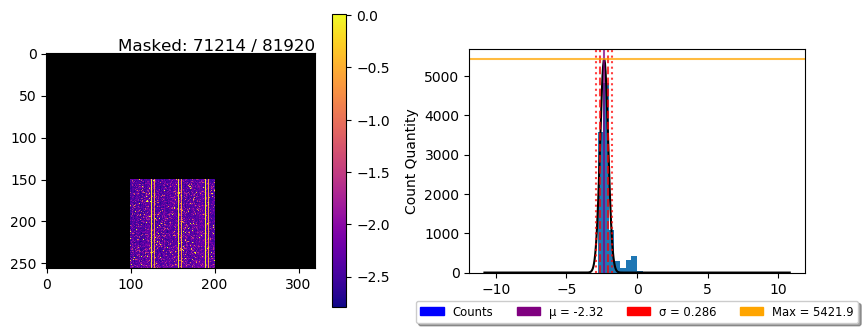

In [10]:
wee = ifa.oscar.multi.plot_single_heatmap_and_histogram('./Data\\TestArray__detBias;11.5Vup,007__.fits',configuration_class=None)

In [ ]:
newconfig.BravoConfig.voltpat_rename_config['begin_garbage'] = 1

In [ ]:
glob.glob('./Data//*', recursive=True)

In [ ]:
issubclass(ifa.yankee.BaseConfig,ifa.yankee.BaseConfig)